#Importing necessary libraries.
yfinance for asset data and datetime for start and end date.

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import yfinance as yf
from datetime import datetime
plt.style.use('fivethirtyeight')

#Defining the assets(the stocks/commodities one wants to include in the portfolio)
we assign the weights(how much money we put into each asset) as equal for each asset.

In [18]:
assets = ["RS","BAJAJHCARE.NS","DABUR.BO","ADANIPOWER.BO","KOTAKBANK.NS"]

weights = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

In [19]:
startdate = '2019-01-01'

today = datetime.today().strftime('%Y-%m-%d')
today

'2025-07-31'

#We use the adjusted stock price to take into account any splits or dividends. We put all this data into a dataframe.

In [20]:
df = pd.DataFrame()

for stock in assets:
    data = yf.download(stock, start=startdate, end=today, auto_adjust=False)
    df[stock] = data['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [21]:
df

,RS,BAJAJHCARE.NS,DABUR.BO,ADANIPOWER.BO,KOTAKBANK.NS
Date,,,,,
2019-01-02,63.354839,NaN,391.470734,50.650002,1234.772827
2019-01-03,61.768517,NaN,397.022858,50.400002,1229.448242
2019-01-04,64.320793,NaN,394.999664,49.950001,1242.088379
2019-01-07,64.161285,NaN,396.175873,50.349998,1240.744751
2019-01-08,66.589500,NaN,392.882263,51.500000,1223.127930
...,...,...,...,...,...
2025-07-24,301.329987,509.250000,512.650024,585.700012,2142.100098
2025-07-25,306.140015,516.250000,511.250000,570.150024,2124.600098
2025-07-28,300.100006,529.650024,522.049988,570.599976,1966.599976


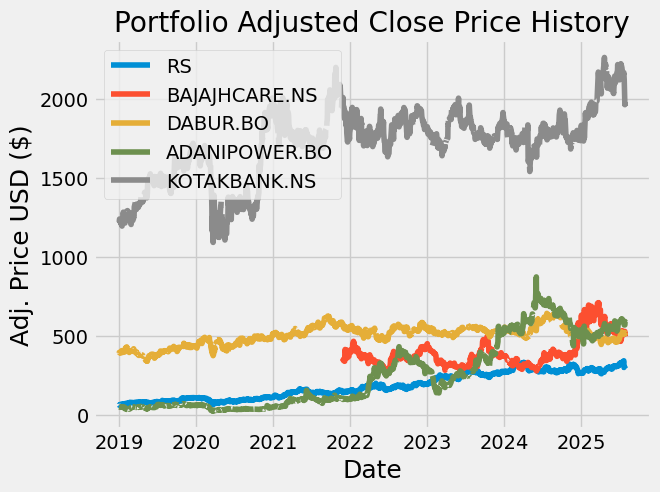

In [22]:
title = "Portfolio Adjusted Close Price History"

my_stocks = df

for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label=c)

plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj. Price USD ($)', fontsize=18)
plt.legend(my_stocks.columns.values, loc='upper left')
plt.show()

#Calculating returns for each day.

In [23]:
returns = df.pct_change()
returns

/tmp/ipython-input-3198757542.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  returns = df.pct_change()


,RS,BAJAJHCARE.NS,DABUR.BO,ADANIPOWER.BO,KOTAKBANK.NS
Date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,-0.025039,NaN,0.014183,-0.004936,-0.004312
2019-01-04,0.041320,NaN,-0.005096,-0.008929,0.010281
2019-01-07,-0.002480,NaN,0.002978,0.008008,-0.001082
2019-01-08,0.037845,NaN,-0.008314,0.022840,-0.014199
...,...,...,...,...,...
2025-07-24,-0.123174,-0.016702,-0.002335,-0.005518,-0.013039
2025-07-25,0.015963,0.013746,-0.002731,-0.026549,-0.008170
2025-07-28,-0.019730,0.025956,0.021125,0.000789,-0.074367


#Calculating the covariance matrix to see the corelation between each asset. We multiply it with 252 as there are 252 trading days in a year on average.

In [24]:
cov_matrix_annual = returns.cov() * 252
cov_matrix_annual


,RS,BAJAJHCARE.NS,DABUR.BO,ADANIPOWER.BO,KOTAKBANK.NS
RS,0.101800,-0.001081,0.006177,0.013557,0.015864
BAJAJHCARE.NS,-0.001081,0.242057,0.013224,0.040999,0.012787
DABUR.BO,0.006177,0.013224,0.050174,0.022196,0.013822
ADANIPOWER.BO,0.013557,0.040999,0.022196,0.294622,0.028080
KOTAKBANK.NS,0.015864,0.012787,0.013822,0.028080,0.077729


#Variance can be regarded as portfolio volatility.

In [25]:

port_variance = np.dot(weights.T, np.dot(cov_matrix_annual, weights))
port_variance

np.float64(0.043905317817381904)

In [26]:
port_risk = np.sqrt(port_variance)
port_risk

np.float64(0.20953595829208385)

In [27]:
portfolioSimpleAnnualRturn = np.sum(returns.mean() * weights) * 252
portfolioSimpleAnnualRturn

np.float64(0.23810960557055022)

#Calculating the base values of returns, risk and volatility.

In [32]:
per_var = str(round(port_variance, 2) * 100) + '%'
per_risk = str(round(port_risk, 2) * 100) + '%'
per_return = str(round(portfolioSimpleAnnualRturn, 2) * 100) + '%'

print("Annual return of the portfolio :"+ per_return)
print("Annual risk of the portfolio :"+ per_risk)
print("Annual variance of the portfolio :"+ per_var)

Annual return of the portfolio :24.0%
Annual risk of the portfolio :21.0%
Annual variance of the portfolio :4.0%


#From the PyPortfolioOpt library use Effiecient Frontier method to optimise the portfolio.

In [33]:
!pip install PyPortfolioOpt

from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [30]:
mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

/usr/local/lib/python3.11/dist-packages/pypfopt/expected_returns.py:32: UserWarning: Some returns are NaN. Please check your price data.
  warnings.warn(


#This give us an optimised portfolio's asset ratios, the new returns, risk, volatility and the sharpe ratio.

In [31]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('RS', 0.48997), ('BAJAJHCARE.NS', 0.0), ('DABUR.BO', 0.17025), ('ADANIPOWER.BO', 0.24539), ('KOTAKBANK.NS', 0.09438)])
Expected annual return: 25.9%
Annual volatility: 23.4%
Sharpe Ratio: 1.11


(np.float64(0.2590958898965234),
 np.float64(0.23428699454063479),
 np.float64(1.1058910478771187))